In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [4]:
datadir = '../../../datasets/ppmi/visit_feature_inputs_asof_2019Jan24_using_CMEDTM/'
treatment_dir = '../../../datasets/ppmi/treatment_pipeline_output_asof_2019Jan24/'
raw_datadir = '../../../datasets/ppmi/raw_data_asof_2019Jan24/'

### Treatment frequency table

In [3]:
pd_treatment_df = pd.read_csv(treatment_dir + 'PD_treatment_between_visits.csv')
hc_treatment_df = pd.read_csv(treatment_dir + 'HC_treatment_between_visits.csv')

In [4]:
pd_treatment_df.columns.values

array(['PATNO', 'EVENT_ID', 'INFODT', 'THYROID', 'ANESTHETIC',
       'IMMUNOSUPPRESSANT', 'ANTIEMETIC', 'ANTIHYPERTENSIVE',
       'ANTIPSYCHOTIC', 'ANTIHISTAMINE', 'CONTRACEPTIVE', 'SLEEP AID',
       'MOOD STABILIZER', 'ANTI BPH', 'SUPPLEMENT', 'NEUROTOXIN',
       'ANALGESIC', 'ANTIINFLAMMATORY', 'ANTIHYPERLIPIDEMIC',
       'ANTIARRHYTHMIC', 'NSAID', 'DERMATOLOGIC', 'ANTIHYPOTENSIVE',
       'ANTIDIARRHEAL', 'PD SUPPLEMENT', 'STIMULANT', 'RARE_CLASS',
       'ANTICANCER', 'ANTITHYROID AGENT', 'COGNITIVE ENHANCER',
       'ANTIFUNGAL', 'OPTHALAMIC', 'HORMONE REPLACEMENT', 'ANTIBIOTIC',
       'ANTITREMOR', 'DOPAMINE REPLACEMENT', 'ANTISPASMODIC',
       'DECONGESTANT', 'DIGESTIVE AID', 'BONE/JOINT HEALTH', 'OTHER',
       'ANTICONVULSANT', 'ANXIOLYTIC', 'MUCOLYTIC', 'ANTIGLAUCOMA',
       'MUSCLE RELAXER', 'BLADDER CONTROL', 'ANTIDEPRESSANT',
       'URIC ACID REDUCER', 'ANTIHYPERGLYCEMIC', 'VACCINE',
       'ANTICOAGULANT/BLOOD THINNER', 'ADRENALCORTICAL REPLACEMENT',
       'BRON

In [6]:
treatment_groupings_list = ['Dopamine replacement', 'Muscle', 'Pain', 'Urinary', 'Anxiety', 'Depression', \
                            'Other psychiatric', 'Cognitive', 'Sleep', 'Digestive', 'Cardiovascular', \
                            'Anti-inflammatory', 'Immune', 'Respiratory', 'Thyroid', 'Supplement', 'Eye', 'Other']
treatment_groupings = {'Dopamine replacement': ['DOPAMINE REPLACEMENT'], \
                       'Muscle': ['ANTICONVULSANT',  'ANTITREMOR',  'ANTISPASMODIC', 'MUSCLE RELAXER'], \
                       'Pain': ['ANESTHETIC',  'ANALGESIC'], \
                       'Urinary': ['BLADDER CONTROL'], \
                       'Anxiety': ['ANXIOLYTIC'], \
                       'Depression': ['ANTIDEPRESSANT'], \
                       'Other psychiatric': ['ANTIPSYCHOTIC',  'MOOD STABILIZER'], \
                       'Cognitive': ['COGNITIVE ENHANCER'], \
                       'Sleep': ['SLEEP AID'], \
                       'Digestive': ['ANTIEMETIC', 'ANTIDIARRHEAL', 'DIGESTIVE AID',  'ANTACID'], \
                       'Cardiovascular': ['ANTIHYPERTENSIVE', 'ANTIARRHYTHMIC',  'ANTIHYPOTENSIVE', \
                                          'ANTICOAGULANT/BLOOD THINNER'], \
                       'Anti-inflammatory': ['ANTIINFLAMMATORY',  'NSAID'], \
                       'Immune': ['IMMUNOSUPPRESSANT', 'ANTIHISTAMINE', 'ANTIVIRAL', 'ANTIBIOTIC', 'ANTIFUNGAL', \
                                  'ANTICANCER', 'VACCINE', 'ADRENALCORTICAL REPLACEMENT'], \
                       'Respiratory': ['DECONGESTANT', 'MUCOLYTIC',  'BRONCHODILATOR'], \
                       'Thyroid': ['THYROID', 'ANTITHYROID AGENT', 'THYROID HORMONE'], \
                       'Supplement': ['SUPPLEMENT',  'PD SUPPLEMENT', 'BONE/JOINT HEALTH'], \
                       'Eye': ['OPTHALAMIC', 'ANTIGLAUCOMA'], \
                       'Other': ['CONTRACEPTIVE', 'ANTI BPH', 'NEUROTOXIN', 'DERMATOLOGIC', 'STIMULANT', \
                                 'HORMONE REPLACEMENT', 'URIC ACID REDUCER', 'OTHER']}
assert set(treatment_groupings_list) == set(treatment_groupings.keys())
pd_num_patnos = float(pd_treatment_df.PATNO.nunique())
hc_num_patnos = float(hc_treatment_df.PATNO.nunique())
for grouping in treatment_groupings_list:
    pd_treatment_df[grouping] = pd_treatment_df[treatment_groupings[grouping]].sum(axis=1)
    hc_treatment_df[grouping] = hc_treatment_df[treatment_groupings[grouping]].sum(axis=1)
    pd_grouping_num_patnos = pd_treatment_df.loc[pd_treatment_df[grouping] > 0].PATNO.nunique()
    hc_grouping_num_patnos = hc_treatment_df.loc[hc_treatment_df[grouping] > 0].PATNO.nunique()
    print(grouping + ': PD: ' + '{0:.3f}'.format(pd_grouping_num_patnos/pd_num_patnos) \
          + ', HC: ' + '{0:.3f}'.format(hc_grouping_num_patnos/hc_num_patnos))

Dopamine replacement: PD: 0.929, HC: 0.020
Muscle: PD: 0.203, HC: 0.092
Pain: PD: 0.191, HC: 0.235
Urinary: PD: 0.109, HC: 0.015
Anxiety: PD: 0.274, HC: 0.071
Depression: PD: 0.385, HC: 0.209
Other psychiatric: PD: 0.073, HC: 0.020
Cognitive: PD: 0.078, HC: 0.000
Sleep: PD: 0.156, HC: 0.122
Digestive: PD: 0.525, HC: 0.342
Cardiovascular: PD: 0.546, HC: 0.546
Anti-inflammatory: PD: 0.648, HC: 0.628
Immune: PD: 0.522, HC: 0.378
Respiratory: PD: 0.099, HC: 0.102
Thyroid: PD: 0.277, HC: 0.184
Supplement: PD: 0.764, HC: 0.699
Eye: PD: 0.092, HC: 0.056
Other: PD: 0.435, HC: 0.423


### MDS-UPDRS treatment initiation + venn diagram

In [4]:
pd_totals_df = pd.read_csv(datadir + 'PD_totals_across_time.csv')

1.42956852792
0.853188566138
174
220
306
88


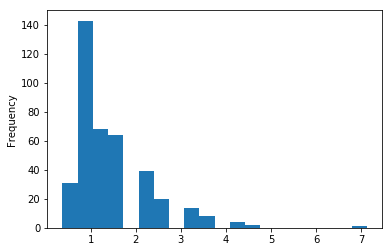

In [11]:
nupdrs3_treated_df = pd_totals_df[['PATNO','EVENT_ID_DUR','NUPDRS3_on','NUPDRS3_off',\
                                   'NUPDRS3_maob']].dropna(subset=['NUPDRS3_on','NUPDRS3_off','NUPDRS3_maob'], \
                                                           how='all')
nupdrs3_treated_df = nupdrs3_treated_df.sort_values(by=['EVENT_ID_DUR'])
nupdrs3_first_treated_df = nupdrs3_treated_df.drop_duplicates(subset=['PATNO'], keep='first')
print(nupdrs3_first_treated_df.EVENT_ID_DUR.mean())
print(nupdrs3_first_treated_df.EVENT_ID_DUR.std())
print(len(nupdrs3_first_treated_df.loc[nupdrs3_first_treated_df['EVENT_ID_DUR']<=1]))
print(len(nupdrs3_first_treated_df.loc[nupdrs3_first_treated_df['EVENT_ID_DUR']>1]))
nupdrs3_first_treated_df.EVENT_ID_DUR.plot.hist(bins=20)

In [14]:
raw_mdsupdrs3_df = pd.read_csv(raw_datadir + 'MDS_UPDRS_Part_III.csv')
raw_mdsupdrs3_df = raw_mdsupdrs3_df.loc[raw_mdsupdrs3_df['PATNO'].isin(set(pd_totals_df.PATNO.unique().tolist()))]
raw_mdsupdrs3_df = raw_mdsupdrs3_df.drop_duplicates(subset=['PATNO','EVENT_ID'])
raw_mdsupdrs3_df.PD_MED_USE.value_counts()

0.0    2255
1.0    1169
2.0     449
3.0     446
4.0     367
5.0     326
6.0     264
7.0     248
Name: PD_MED_USE, dtype: int64

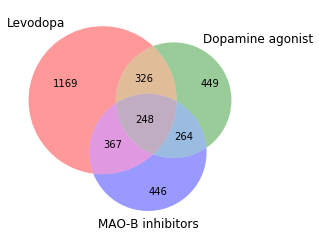

In [7]:
from matplotlib_venn import venn3
# 1: levodopa, 2: dopamine agonist, 3: MAO-B, 4: 1 + 3, 5: 1 + 2, 6: 2 + 3, 7: 1 + 2 + 3
#(Abc, aBc, ABc, abC, AbC, aBC, ABC)
venn3(subsets=(1169, 449, 326, 446, 367, 264, 248), set_labels=('Levodopa', 'Dopamine agonist', 'MAO-B inhibitors'))
#plt.show()
plt.savefig('mdsupdrs3_treatment_venn.pdf')
plt.show()

### Baseline and year 3 stats

In [6]:
cohorts = ['PD','HC','PRODROMA','GENPD','GENUN','REGPD','REGUN','SWEDD']
for cohort in cohorts:
    cohort_totals_df = pd.read_csv(datadir + cohort + '_totals_across_time.csv')
    cohort_totals_df['QUIP'] = np.where(cohort_totals_df['QUIP']>0, 1, 0)
    cohort_totals_df['STAI'] = np.where(np.logical_and(~pd.isnull(cohort_totals_df['STATE_ANXIETY']), \
                                                       ~pd.isnull(cohort_totals_df['TRAIT_ANXIETY'])), \
                                        cohort_totals_df[['STATE_ANXIETY','TRAIT_ANXIETY']].sum(axis=1), float('NaN'))
    sc_df = cohort_totals_df.loc[cohort_totals_df['EVENT_ID_DUR']==0]
    bl_df = cohort_totals_df.loc[cohort_totals_df['EVENT_ID_DUR']==0.125]
    sc_df \
        = sc_df[['PATNO','GDSSHORT','QUIP','STAI']].merge(bl_df[['PATNO','GDSSHORT','QUIP','STAI']], on=['PATNO'], \
                                                          suffixes=['_sc','_bl'], how='outer', validate='one_to_one')
    bl_df = sc_df[['PATNO','GDSSHORT_bl','QUIP_bl','STAI_bl']]
    bl_df.rename(columns={'GDSSHORT_bl': 'GDSSHORT', 'QUIP_bl': 'QUIP', 'STAI_bl': 'STAI'}, inplace=True)
    sc_df = sc_df[['PATNO','GDSSHORT_sc','QUIP_sc','STAI_sc']]
    sc_df.rename(columns={'GDSSHORT_sc': 'GDSSHORT', 'QUIP_sc': 'QUIP', 'STAI_sc': 'STAI'}, inplace=True)
    sc_df.update(bl_df, overwrite=False)
    yr3_df = cohort_totals_df.loc[cohort_totals_df['EVENT_ID_DUR']==3.125]
    print(cohort)
    print('GDS: {0:.4f}'.format(np.nanmean(sc_df['GDSSHORT'].values)) \
          + ', {0:.4f}, '.format(np.nanmean(yr3_df['GDSSHORT'].values)) \
          + str(len(sc_df['GDSSHORT'].dropna())) + ', ' + str(len(yr3_df['GDSSHORT'].dropna())))
    print('QUIP: {0:.4f}'.format(np.nanmean(sc_df['QUIP'].values)) \
          + ', {0:.4f}, '.format(np.nanmean(yr3_df['QUIP'].values)) \
          + str(len(sc_df['QUIP'].dropna())) + ', ' + str(len(yr3_df['QUIP'].dropna())))
    print('STAI: {0:.4f}'.format(np.nanmean(sc_df['STAI'].values)) \
          + ' ({0:.4f})'.format(np.nanstd(sc_df['STAI'].values)) \
          + ', {0:.4f}'.format(np.nanmean(yr3_df['STAI'].values)) \
          +' ({0:.4f}), '.format(np.nanstd(yr3_df['STAI'].values)) \
          + str(len(sc_df['STAI'].dropna())) + ', ' + str(len(yr3_df['STAI'].dropna())))

PD
GDS: 0.1395, 0.1694, 423, 366
QUIP: 0.0000, 0.2322, 423, 366
STAI: 65.3555 (18.2895), 64.9258 (18.7260), 422, 364
HC
GDS: 0.0663, 0.0419, 196, 167
QUIP: 0.0000, 0.1617, 196, 167
STAI: 57.1786 (14.0416), 55.4850 (13.5142), 196, 167
PRODROMA
GDS: 0.1231, 0.2778, 65, 54
QUIP: 0.0000, 0.1667, 65, 54
STAI: 63.0615 (17.1221), 64.5849 (18.9632), 65, 53
GENPD
GDS: 0.2907, 0.3448, 258, 87
QUIP: 0.0000, 0.3516, 265, 91
STAI: 71.4440 (19.8506), 72.0581 (20.4464), 259, 86
GENUN
GDS: 0.1111, 0.0909, 396, 66
QUIP: 0.0000, 0.2059, 399, 68
STAI: 61.8384 (17.7739), 60.3636 (14.9023), 396, 66
REGPD
GDS: 0.0000, 0.5000, 1, 2
QUIP: 0.0000, 0.0000, 203, 2
STAI: 76.0000 (0.0000), 94.5000 (8.5000), 1, 2
REGUN
GDS: 0.0000, nan, 1, 0
QUIP: 0.0000, nan, 249, 0
STAI: nan (nan), nan (nan), 0, 0
SWEDD
GDS: 0.2969, 0.0000, 64, 1
QUIP: 0.0000, 0.0000, 64, 1
STAI: 69.7500 (17.9783), 50.0000 (0.0000), 64, 1


/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


In [4]:
pd_other_df = pd.read_csv(datadir + 'PD_other_across_time.csv')
pd_other_df.columns.values

array(['PATNO', 'EVENT_ID', 'DFRAPSPE', 'AGE', 'HSPA8', 'DFHEMTRO',
       'COGSTATE', 'Platelets_LUSRES', 'DFOTHHYP', 'COGDECLN', 'DFUNIRIG',
       'C16 SM', 'PLRRRSP_indet', 'DFBRADYA', 'MSEADLG', 'E3_ROI1_mean',
       'DFBRADYP', 'BPARM', 'C22 SM', 'DFOTHTRM',
       'RBC Morphology_LSIRES:Anisocytosis', 'Lymphocytes (%)_LRESFLG:L',
       'RBC Morphology_LSIRES:Microcytic', 'Lymphocytes (%)_LRESFLG:H',
       'DFRIGIDP', 'Serum Potassium_LRESFLG:L', 'LTHSWRK',
       'Hematocrit_LUSRES', 'DFRIGIDA', 'PTAU_ABETA_ratio',
       'Neutrophils (%)_LRESFLG:H', 'TTAU_ABETA_ratio',
       'Neutrophils (%)_LRESFLG:L', 'RFLLLRSP_hyper', 'EFTUD2',
       '3,4-Dihydroxyphenylalanine (DOPA)', 'WRKVLHR',
       'PRODROMAL_DIAG:NO_NEURO', 'Serum Glucose_LSIRES',
       'Basophils (%)_LSIRES', 'E2_ROI4_mean', 'RFLRLRSP_hypo',
       '3,4-Dihydroxymandelic acid', 'FA_ROI3_mean', 'RBC_LRESFLG:LT',
       'DFPSYCH', '3,4-Dihydroxyphenylglycol (DOPEG)',
       'Alkaline Phosphatase-QT_LRESFLG:HT', '

In [6]:
pd_other_df.COGSTATE.value_counts()

1.0    1737
2.0     343
3.0      45
Name: COGSTATE, dtype: int64

In [12]:
cohorts = ['PD','HC','PRODROMA','GENPD','GENUN','REGPD','REGUN','SWEDD']
for cohort in cohorts:
    cohort_totals_df = pd.read_csv(datadir + cohort + '_totals_across_time.csv')
    sc_totals_df = cohort_totals_df.loc[cohort_totals_df['EVENT_ID_DUR']==0]
    bl_totals_df = cohort_totals_df.loc[cohort_totals_df['EVENT_ID_DUR']==0.125]
    cog_cols = ['HVLT_retent', 'HVLT_discrim_recog', 'HVLT_immed_recall', 'LNS', 'BJLO', 'SEMANTIC_FLUENCY']
    sc_totals_df \
        = sc_totals_df[['PATNO']+cog_cols].merge(bl_totals_df[['PATNO']+cog_cols], on=['PATNO'], \
                                                 suffixes=['_sc','_bl'], how='outer', validate='one_to_one')
    cog_bl_cols = []
    cog_bl_cols_dict = dict()
    cog_sc_cols = []
    cog_sc_cols_dict = dict()
    for col in cog_cols:
        cog_bl_cols.append(col + '_bl')
        cog_bl_cols_dict[col + '_bl'] = col
        cog_sc_cols.append(col + '_sc')
        cog_sc_cols_dict[col + '_sc'] = col
    bl_totals_df = sc_totals_df[['PATNO']+cog_bl_cols]
    bl_totals_df.rename(columns=cog_bl_cols_dict, inplace=True)
    sc_totals_df = sc_totals_df[['PATNO']+cog_sc_cols]
    sc_totals_df.rename(columns=cog_sc_cols_dict, inplace=True)
    sc_totals_df.update(bl_totals_df, overwrite=False)
    cohort_other_df = pd.read_csv(datadir + cohort + '_other_across_time.csv')
    cohort_other_df['MCI_dementia'] = np.where(cohort_other_df['COGSTATE']>1, 1, 0)
    sc_other_df = cohort_other_df.loc[cohort_other_df['EVENT_ID_DUR']==0]
    bl_other_df = cohort_other_df.loc[cohort_other_df['EVENT_ID_DUR']==0.125]
    sc_other_df \
        = sc_other_df[['PATNO','MCI_dementia','DVT_SDM']].merge(bl_other_df[['PATNO','MCI_dementia','DVT_SDM']], \
                                                                on=['PATNO'], how='outer', validate='one_to_one', \
                                                                suffixes=['_sc','_bl'])
    bl_other_df = sc_other_df[['PATNO','MCI_dementia_bl','DVT_SDM_bl']]
    bl_other_df.rename(columns={'MCI_dementia_bl':'MCI_dementia', 'DVT_SDM_bl':'DVT_SDM'}, inplace=True)
    sc_other_df = sc_other_df[['PATNO','MCI_dementia_sc','DVT_SDM_sc']]
    sc_other_df.rename(columns={'MCI_dementia_sc':'MCI_dementia', 'DVT_SDM_sc':'DVT_SDM'}, inplace=True)
    sc_other_df.update(bl_other_df, overwrite=False)
    print(cohort)
    for col in cog_cols:
        print(col + ': {0:.4f}'.format(np.nanmean(sc_totals_df[col].values)) \
              + ' ({0:.4f}), '.format(np.nanstd(sc_totals_df[col].values)) \
              + str(len(sc_totals_df[col].dropna())))
    print('MCI_dementia: {0:.4f}'.format(np.nanmean(sc_other_df['MCI_dementia'].values)) \
          + ' ({0:.4f}), '.format(np.nanstd(sc_other_df['MCI_dementia'].values)) \
          + str(len(sc_other_df['MCI_dementia'].dropna())))
    print('DVT_SDM: {0:.4f}'.format(np.nanmean(sc_other_df['DVT_SDM'].values)) \
          + ' ({0:.4f})'.format(np.nanstd(sc_other_df['DVT_SDM'].values)) \
          + str(len(sc_other_df['DVT_SDM'].dropna())))

PD
HVLT_retent: 0.8554 (0.2012), 422
HVLT_discrim_recog: 9.6342 (2.6226), 421
HVLT_immed_recall: 24.4431 (4.9725), 422
LNS: 10.5853 (2.6531), 422
BJLO: 12.7701 (2.1278), 422
SEMANTIC_FLUENCY: 48.6659 (11.6206), 422
MCI_dementia: 0.0000 (0.0000), 423
DVT_SDM: 44.9913 (9.1751)422
HC
HVLT_retent: 0.9047 (0.1798), 196
HVLT_discrim_recog: 10.0663 (2.7886), 196
HVLT_immed_recall: 26.0459 (4.4861), 196
LNS: 10.8673 (2.5640), 196
BJLO: 13.1224 (1.9783), 196
SEMANTIC_FLUENCY: 51.7959 (11.1725), 196
MCI_dementia: 0.0000 (0.0000), 196
DVT_SDM: 50.1524 (10.3363)196
PRODROMA
HVLT_retent: 0.7691 (0.2901), 63
HVLT_discrim_recog: 9.3333 (2.2039), 63
HVLT_immed_recall: 21.7937 (5.2800), 63
LNS: 9.4444 (2.8440), 63
BJLO: 11.9677 (2.2787), 62
SEMANTIC_FLUENCY: 45.0000 (10.7748), 63
MCI_dementia: 0.0000 (0.0000), 65
DVT_SDM: 44.3081 (9.5576)62
GENPD
HVLT_retent: 0.8142 (0.2511), 259
HVLT_discrim_recog: 9.9457 (2.3750), 258
HVLT_immed_recall: 23.9498 (5.5376), 259
LNS: 9.7043 (3.1373), 257
BJLO: 11.5642 (2

/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice


SWEDD
HVLT_retent: 0.8350 (0.2304), 64
HVLT_discrim_recog: 8.4844 (3.7666), 64
HVLT_immed_recall: 24.2812 (4.3426), 64
LNS: 9.8750 (2.6369), 64
BJLO: 12.7500 (2.3585), 64
SEMANTIC_FLUENCY: 45.2031 (12.3265), 64
MCI_dementia: 0.0000 (0.0000), 64
DVT_SDM: 45.4037 (10.9760)64


In [16]:
cohorts = ['PD','HC','PRODROMA','GENPD','GENUN','REGPD','REGUN','SWEDD']
for cohort in cohorts:
    cohort_baseline_df = pd.read_csv(datadir + cohort + '_baseline.csv')
    print(cohort + ': {0:.4f}'.format(np.nanmean(cohort_baseline_df.UPSIT.values)) \
          + ' ({0:.4f}), '.format(np.nanstd(cohort_baseline_df.UPSIT.values)) \
          + str(len(cohort_baseline_df.dropna(subset=['UPSIT']))))

PD: 22.3522 (8.2202), 423
HC: 33.9796 (4.8445), 196
PRODROMA: 17.1803 (6.5047), 61
GENPD: 21.6367 (8.8687), 256
GENUN: 33.1151 (5.1756), 391
REGPD: 20.6500 (9.3347), 200
REGUN: 33.0894 (5.5348), 246
SWEDD: 31.3594 (6.1780), 64


In [17]:
pd_totals_df = pd.read_csv(datadir + 'PD_totals_across_time.csv')
print(pd_totals_df.EPWORTH.value_counts())
print(pd_totals_df.REMSLEEP.value_counts())

0.0    2269
1.0     689
Name: EPWORTH, dtype: int64
0.0    1703
1.0    1257
Name: REMSLEEP, dtype: int64


In [20]:
cohorts = ['PD','HC','PRODROMA','GENPD','GENUN','REGPD','REGUN','SWEDD']
for cohort in cohorts:
    cohort_totals_df = pd.read_csv(datadir + cohort + '_totals_across_time.csv')
    sc_df = cohort_totals_df.loc[cohort_totals_df['EVENT_ID_DUR']==0]
    bl_df = cohort_totals_df.loc[cohort_totals_df['EVENT_ID_DUR']==0.125]
    sc_df \
        = sc_df[['PATNO','SCOPA-AUT','REMSLEEP','EPWORTH']].merge(bl_df[['PATNO','SCOPA-AUT','REMSLEEP','EPWORTH']], \
                                                                  on=['PATNO'], suffixes=['_sc','_bl'], how='outer', \
                                                                  validate='one_to_one')
    bl_df = sc_df[['PATNO','SCOPA-AUT_bl','REMSLEEP_bl','EPWORTH_bl']]
    bl_df.rename(columns={'SCOPA-AUT_bl': 'SCOPA-AUT', 'REMSLEEP_bl': 'REMSLEEP', 'EPWORTH_bl': 'EPWORTH'}, \
                 inplace=True)
    sc_df = sc_df[['PATNO','SCOPA-AUT_sc','REMSLEEP_sc','EPWORTH_sc']]
    sc_df.rename(columns={'SCOPA-AUT_sc': 'SCOPA-AUT', 'REMSLEEP_sc': 'REMSLEEP', 'EPWORTH_sc': 'EPWORTH'}, \
                 inplace=True)
    sc_df.update(bl_df, overwrite=False)
    yr3_df = cohort_totals_df.loc[cohort_totals_df['EVENT_ID_DUR']==3.125]
    print(cohort)
    print('SCOPA-AUT: {0:.4f}'.format(np.nanmean(sc_df['SCOPA-AUT'].values)) \
          + ' ({0:.4f})'.format(np.nanstd(sc_df['SCOPA-AUT'].values)) \
          + ', {0:.4f}'.format(np.nanmean(yr3_df['SCOPA-AUT'].values)) \
          +' ({0:.4f}), '.format(np.nanstd(yr3_df['SCOPA-AUT'].values)) \
          + str(len(sc_df['SCOPA-AUT'].dropna())) + ', ' + str(len(yr3_df['SCOPA-AUT'].dropna())))
    print('EPWORTH: {0:.4f}'.format(np.nanmean(sc_df['EPWORTH'].values)) \
          + ', {0:.4f}, '.format(np.nanmean(yr3_df['EPWORTH'].values)) \
          + str(len(sc_df['EPWORTH'].dropna())) + ', ' + str(len(yr3_df['EPWORTH'].dropna())))
    print('REMSLEEP: {0:.4f}'.format(np.nanmean(sc_df['REMSLEEP'].values)) \
          + ', {0:.4f}, '.format(np.nanmean(yr3_df['REMSLEEP'].values)) \
          + str(len(sc_df['SCOPA-AUT'].dropna())) + ', ' + str(len(yr3_df['GDSSHORT'].dropna())))

PD
SCOPA-AUT: 9.4988 (6.1459), 12.3798 (7.0152), 423, 366
EPWORTH: 0.1560, 0.2747, 423, 364
REMSLEEP: 0.3759, 0.4372, 423, 366
HC
SCOPA-AUT: 5.8769 (3.7328), 6.3353 (4.0307), 195, 167
EPWORTH: 0.1231, 0.1557, 195, 167
REMSLEEP: 0.1990, 0.1617, 195, 167
PRODROMA
SCOPA-AUT: 12.5469 (7.5207), 12.6852 (6.7270), 64, 54
EPWORTH: 0.2188, 0.1296, 64, 54
REMSLEEP: 0.7031, 0.6111, 64, 54
GENPD
SCOPA-AUT: 12.9768 (8.1368), 15.9101 (9.5572), 259, 89
EPWORTH: 0.2317, 0.2921, 259, 89
REMSLEEP: 0.4015, 0.3034, 259, 87
GENUN
SCOPA-AUT: 8.3522 (6.0996), 9.1667 (6.4727), 389, 66
EPWORTH: 0.1003, 0.0606, 389, 66
REMSLEEP: 0.2082, 0.1515, 389, 66
REGPD
SCOPA-AUT: 6.0000 (0.0000), 7.5000 (2.5000), 1, 2
EPWORTH: 0.0000, 0.0000, 1, 2
REMSLEEP: 0.3781, 0.5000, 1, 2
REGUN
SCOPA-AUT: nan (nan), nan (nan), 0, 0
EPWORTH: nan, nan, 0, 0
REMSLEEP: 0.1767, nan, 0, 0
SWEDD
SCOPA-AUT: 13.7500 (8.7732), 9.0000 (0.0000), 64, 1
EPWORTH: 0.3281, 0.0000, 64, 1
REMSLEEP: 0.4062, 1.0000, 64, 1


/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


In [23]:
pd_baseline_df = pd.read_csv(datadir + 'PD_baseline.csv')
pd_baseline_df.columns.values

array(['PATNO', 'EVENT_ID', 'CNO', 'MALE', 'HISPLAT', 'RAWHITE',
       'RAASIAN', 'RABLACK', 'RAINDALS', 'RAHAWOPI', 'RANOS', 'BIOMOMPD',
       'BIODADPD', 'FULSIBPD', 'HAFSIBPD', 'MAGPARPD', 'PAGPARPD',
       'MATAUPD', 'PATAUPD', 'KIDSPD', 'EDUCYRS', 'RIGHT_HANDED',
       'LEFT_HANDED', 'UPSITBK1', 'UPSITBK2', 'UPSITBK3', 'UPSITBK4',
       'UPSIT', 'INFODT', 'INFODT_DIS_DUR', 'INFODT_TIME_SINCE_ENROLL',
       'EVENT_ID_DUR', 'DIS_DUR_BY_CONSENTDT'], dtype=object)

In [31]:
# TODO: baseline features (table 1.1)
cohorts = ['PD','HC','PRODROMA','GENPD','GENUN','REGPD','REGUN','SWEDD']
for cohort in cohorts:
    cohort_baseline_df = pd.read_csv(datadir + cohort + '_baseline.csv')
    cohort_baseline_df['FAMHIST'] \
        = np.where(cohort_baseline_df[['BIOMOMPD','BIODADPD','PATAUPD','KIDSPD']].sum(axis=1) > 0, 1, 0)
    print(cohort)
    print('Male: {0:.3f}'.format(np.nanmean(cohort_baseline_df.MALE.values)))
    print('White: {0:.3f}'.format(np.nanmean(cohort_baseline_df.RAWHITE.values)))
    print('Fam hist: {0:.3f}'.format(np.nanmean(cohort_baseline_df.FAMHIST.values)))
    print('Time since diag: {0:.3f}'.format(np.nanmean(cohort_baseline_df.DIS_DUR_BY_CONSENTDT.values)) \
          + ' ({0:.3f}), '.format(np.nanstd(cohort_baseline_df.DIS_DUR_BY_CONSENTDT.values)) \
          + str(len(cohort_baseline_df['DIS_DUR_BY_CONSENTDT'].dropna())))

PD
Male: 0.655
White: 0.948
Fam hist: 0.128
Time since diag: 0.577 (0.530), 423
HC
Male: 0.641
White: 0.938
Fam hist: 0.010
Time since diag: nan (nan), 0
PRODROMA
Male: 0.785
White: 0.908
Fam hist: 0.092
Time since diag: -2.025 (1.077), 15
GENPD
Male: 0.487
White: 0.974
Fam hist: 0.434
Time since diag: 3.234 (2.213), 265
GENUN
Male: 0.396
White: 0.985
Fam hist: 0.722
Time since diag: -0.834 (0.975), 16
REGPD
Male: 0.535
White: 0.975
Fam hist: 0.419
Time since diag: 9.320 (6.361), 199
REGUN
Male: 0.391
White: 0.988
Fam hist: 0.683
Time since diag: 0.125 (0.000), 3
SWEDD
Male: 0.625
White: 0.953
Fam hist: 0.250
Time since diag: 0.525 (0.517), 64


/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


In [26]:
cohorts = ['PD','HC','PRODROMA','GENPD','GENUN','REGPD','REGUN','SWEDD']
for cohort in cohorts:
    cohort_other_df = pd.read_csv(datadir + cohort + '_other_across_time.csv')
    sc_df = cohort_other_df.loc[cohort_other_df['EVENT_ID_DUR']==0]
    bl_df = cohort_other_df.loc[cohort_other_df['EVENT_ID_DUR']==0.125]
    sc_df = sc_df[['PATNO','AGE']].merge(bl_df[['PATNO','AGE']], on=['PATNO'], suffixes=['_sc','_bl'], how='outer', \
                                         validate='one_to_one')
    bl_df = sc_df[['PATNO','AGE_bl']]
    bl_df.rename(columns={'AGE_bl': 'AGE'}, inplace=True)
    sc_df = sc_df[['PATNO','AGE_sc']]
    sc_df.rename(columns={'AGE_sc': 'AGE'}, inplace=True)
    sc_df.update(bl_df, overwrite=False)
    print(cohort)
    print('AGE: {0:.4f}'.format(np.nanmean(sc_df['AGE'].values)) \
          + ' ({0:.4f})'.format(np.nanstd(sc_df['AGE'].values)))

PD
AGE: 61.5661 (9.6923)
HC
AGE: 63.0510 (11.0232)
PRODROMA
AGE: 68.8324 (5.7334)
GENPD
AGE: 62.1395 (10.3163)
GENUN
AGE: 61.6730 (7.6645)
REGPD
AGE: 70.3241 (9.9176)
REGUN
AGE: 49.4170 (14.7352)
SWEDD
AGE: 60.6954 (10.1004)


In [28]:
cohorts = ['PD','HC','PRODROMA','GENPD','GENUN','REGPD','REGUN','SWEDD']
print('Num visits')
for cohort in cohorts:
    cohort_totals_df = pd.read_csv(datadir + cohort + '_totals_across_time.csv')
    cohort_totals_df = cohort_totals_df.dropna(subset=['NUPDRS2'])
    num_visits = []
    for patno in cohort_totals_df.PATNO.unique():
        num_visits.append(len(cohort_totals_df.loc[cohort_totals_df['PATNO']==patno]))
    print(cohort + ': {0:.4f}'.format(np.nanmean(np.array(num_visits))) \
          + ' ({0:.4f})'.format(np.nanstd(np.array(num_visits))))

Num visits
PD: 13.0591 (3.1822)
HC: 5.7755 (1.6935)
PRODROMA: 10.9231 (2.3749)
GENPD: 5.6868 (2.8344)
GENUN: 4.4221 (2.5397)
REGPD: 1.4653 (0.7184)
REGUN: 1.2972 (0.5378)
SWEDD: 7.7031 (1.9739)


In [34]:
cohorts = ['PD','HC','PRODROMA','GENPD','GENUN','REGPD','REGUN','SWEDD']
print('Enroll time')
for cohort in cohorts:
    cohort_totals_df = pd.read_csv(datadir + cohort + '_totals_across_time.csv')
    cohort_totals_df = cohort_totals_df.sort_values(by=['EVENT_ID_DUR'])
    cohort_totals_df = cohort_totals_df.drop_duplicates(subset=['PATNO'], keep='last')
    print(cohort + ': {0:.4f}'.format(np.nanmean(cohort_totals_df.EVENT_ID_DUR.values)) \
          + ' ({0:.4f})'.format(np.nanstd(cohort_totals_df.EVENT_ID_DUR.values)))

Enroll time
PD: 5.3646 (1.7114)
HC: 5.4694 (1.9118)
PRODROMA: 3.7481 (0.9661)
GENPD: 2.2682 (1.4285)
GENUN: 2.2075 (1.3793)
REGPD: 1.0255 (1.2012)
REGUN: 0.7234 (1.0801)
SWEDD: 2.2421 (1.1038)


In [4]:
pd_other_df = pd.read_csv(datadir + 'PD_other_across_time.csv')
td_pigd_cols = []
for col in pd_other_df.columns:
    if col.startswith('TD_PIGD'):
        td_pigd_cols.append(col)
td_pigd_cols

['TD_PIGD_off:tremor',
 'TD_PIGD_untreated:indet',
 'TD_PIGD_maob:tremor',
 'TD_PIGD_untreated:posture',
 'TD_PIGD_off:posture',
 'TD_PIGD_maob:posture',
 'TD_PIGD_untreated:tremor',
 'TD_PIGD_on:indet',
 'TD_PIGD_off:indet',
 'TD_PIGD_on:tremor',
 'TD_PIGD_maob:indet',
 'TD_PIGD_on:posture']

In [6]:
sc_other_df = pd_other_df.loc[pd_other_df['EVENT_ID_DUR']==0]
yr3_other_df = pd_other_df.loc[pd_other_df['EVENT_ID_DUR']==3.125]
sc_td_count = len(sc_other_df.loc[sc_other_df['TD_PIGD_untreated:tremor']==1])
sc_pigd_count = len(sc_other_df.loc[sc_other_df['TD_PIGD_untreated:posture']==1])
sc_indet_count = len(sc_other_df.loc[sc_other_df['TD_PIGD_untreated:indet']==1])
sc_total_count = float(sc_td_count + sc_pigd_count + sc_indet_count)
print(sc_td_count/sc_total_count, sc_pigd_count/sc_total_count)
tremor_cols = []
posture_cols = []
for col in td_pigd_cols:
    if col.endswith('tremor'):
        tremor_cols.append(col)
    elif col.endswith('posture'):
        posture_cols.append(col)
yr3_other_df = yr3_other_df.dropna(subset=td_pigd_cols, how='all')
yr3_other_df['TD_PIGD:tremor'] = np.where(np.nansum(yr3_other_df[tremor_cols].values, axis=1)>0, 1, 0)
yr3_other_df['TD_PIGD:posture'] = np.where(np.nansum(yr3_other_df[posture_cols].values, axis=1)>0, 1, 0)
yr3_other_df['TD_PIGD:both'] = np.where(yr3_other_df[['TD_PIGD:tremor','TD_PIGD:posture']].sum(axis=1)==2,1,0)
print(yr3_other_df['TD_PIGD:tremor'].mean(), yr3_other_df['TD_PIGD:posture'].mean(), \
      yr3_other_df['TD_PIGD:both'].mean())

(0.8274231678486997, 0.05673758865248227)
(0.7103825136612022, 0.319672131147541, 0.07103825136612021)


(0.788813117975617, 0.0)


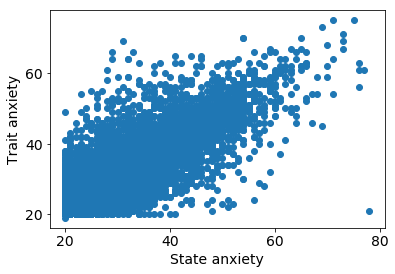

In [9]:
cohorts = ['PD','HC','PRODROMA','GENPD','GENUN','REGPD','REGUN','SWEDD']
state_anxiety = []
trait_anxiety = []
for cohort in cohorts:
    cohort_totals_df = pd.read_csv(datadir + cohort + '_totals_across_time.csv')
    cohort_totals_df = cohort_totals_df.dropna(subset=['STATE_ANXIETY','TRAIT_ANXIETY'])
    state_anxiety += cohort_totals_df.STATE_ANXIETY.values.tolist()
    trait_anxiety += cohort_totals_df.TRAIT_ANXIETY.values.tolist()
from scipy.stats import pearsonr
print(pearsonr(state_anxiety, trait_anxiety))
plt.scatter(state_anxiety, trait_anxiety)
plt.rcParams.update({'font.size':18})
plt.xlabel('State anxiety')
plt.ylabel('Trait anxiety')
plt.savefig('state_trait_anxiety_corr.pdf')
plt.show()

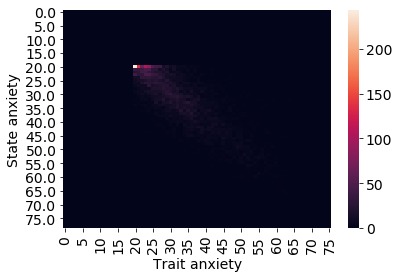

In [12]:
cohorts = ['PD','HC','PRODROMA','GENPD','GENUN','REGPD','REGUN','SWEDD']
state_anxiety_min = 0
state_anxiety_max = 0
trait_anxiety_min = 0
trait_anxiety_max = 0
for cohort in cohorts:
    cohort_totals_df = pd.read_csv(datadir + cohort + '_totals_across_time.csv')
    cohort_totals_df = cohort_totals_df.dropna(subset=['STATE_ANXIETY','TRAIT_ANXIETY'])
    cohort_state_max = cohort_totals_df.STATE_ANXIETY.max()
    cohort_state_min = cohort_totals_df.STATE_ANXIETY.min()
    cohort_trait_max = cohort_totals_df.TRAIT_ANXIETY.max()
    cohort_trait_min = cohort_totals_df.TRAIT_ANXIETY.min()
    if cohort_state_max > state_anxiety_max:
        state_anxiety_max = cohort_state_max
    if cohort_trait_max > trait_anxiety_max:
        trait_anxiety_max = cohort_trait_max
    if cohort_state_min < state_anxiety_min:
        state_anxiety_min = cohort_state_min
    if cohort_trait_min < trait_anxiety_min:
        trait_anxiety_min = cohort_trait_min
state_trait_arr = np.zeros((int(state_anxiety_max - state_anxiety_min + 1), \
                            int(trait_anxiety_max - trait_anxiety_min + 1)))
for cohort in cohorts:
    cohort_totals_df = pd.read_csv(datadir + cohort + '_totals_across_time.csv')
    cohort_totals_df = cohort_totals_df.dropna(subset=['STATE_ANXIETY','TRAIT_ANXIETY'])
    state_arr = cohort_totals_df.STATE_ANXIETY.values.astype(np.int)
    trait_arr = cohort_totals_df.TRAIT_ANXIETY.values.astype(np.int)
    for idx in range(len(state_arr)):
        state_idx = state_arr[idx] - state_anxiety_min
        trait_idx = trait_arr[idx] - trait_anxiety_min
        state_trait_arr[state_idx, trait_idx] += 1
state_trait_arr_df = pd.DataFrame({'index': np.arange(state_anxiety_min, state_anxiety_max+1)})
for trait_idx in range(state_trait_arr.shape[1]):
    state_trait_arr_df[trait_anxiety_min + trait_idx] = state_trait_arr[:,trait_idx]
state_trait_arr_df.set_index('index', inplace=True)
from seaborn import heatmap
plt.rcParams.update({'font.size':14})
heatmap(state_trait_arr_df)
plt.ylabel('State anxiety')
plt.xlabel('Trait anxiety')
plt.show()

### Prodromal diagnoses

In [3]:
prodromal_other_df = pd.read_csv(datadir + 'PRODROMA_other_across_time.csv')
prodromal_other_df.columns.values

array(['PATNO', 'EVENT_ID', 'DFRAPSPE', 'AGE', 'HSPA8', 'DFHEMTRO',
       'COGSTATE', 'Platelets_LUSRES', 'DFOTHHYP', 'COGDECLN', 'DFUNIRIG',
       'C16 SM', 'PLRRRSP_indet', 'DFBRADYA', 'MSEADLG', 'E3_ROI1_mean',
       'DFBRADYP', 'BPARM', 'C22 SM', 'DFOTHTRM',
       'RBC Morphology_LSIRES:Anisocytosis', 'Lymphocytes (%)_LRESFLG:L',
       'RBC Morphology_LSIRES:Microcytic', 'Lymphocytes (%)_LRESFLG:H',
       'DFRIGIDP', 'Serum Potassium_LRESFLG:L', 'LTHSWRK',
       'Hematocrit_LUSRES', 'DFRIGIDA', 'PTAU_ABETA_ratio',
       'Neutrophils (%)_LRESFLG:H', 'TTAU_ABETA_ratio',
       'Neutrophils (%)_LRESFLG:L', 'RFLLLRSP_hyper', 'EFTUD2',
       '3,4-Dihydroxyphenylalanine (DOPA)', 'WRKVLHR',
       'PRODROMAL_DIAG:NO_NEURO', 'Serum Glucose_LSIRES',
       'Basophils (%)_LSIRES', 'E2_ROI4_mean', 'RFLRLRSP_hypo',
       '3,4-Dihydroxymandelic acid', 'FA_ROI3_mean', 'RBC_LRESFLG:LT',
       'DFPSYCH', '3,4-Dihydroxyphenylglycol (DOPEG)',
       'Alkaline Phosphatase-QT_LRESFLG:HT', '

In [4]:
prodromal_diag_cols = []
for col in prodromal_other_df.columns:
    if col.startswith('PRODROMAL_DIAG:'):
        prodromal_diag_cols.append(col)
prodromal_diag_cols

['PRODROMAL_DIAG:NO_NEURO',
 'PRODROMAL_DIAG:PHENOCONV',
 'PRODROMAL_DIAG:MOTOR_PRODROMA',
 'PRODROMAL_DIAG:NONMOTOR_PRODROMA']

In [15]:
phenoconv_patnos = prodromal_other_df.loc[prodromal_other_df['PRODROMAL_DIAG:PHENOCONV']==1].PATNO.unique()
motor_patnos = prodromal_other_df.loc[prodromal_other_df['PRODROMAL_DIAG:MOTOR_PRODROMA']==1].PATNO.unique()
nonmotor_patnos = prodromal_other_df.loc[prodromal_other_df['PRODROMAL_DIAG:NONMOTOR_PRODROMA']==1].PATNO.unique()
no_neuro_patnos = prodromal_other_df.loc[prodromal_other_df['PRODROMAL_DIAG:NO_NEURO']==1].PATNO.unique()

In [16]:
print(phenoconv_patnos)
print(motor_patnos)
print(nonmotor_patnos)
print(no_neuro_patnos)

[14426 16580 16644 18567 60013 60024 60033 60035 60048 60065 60075 60107
 85242 90456 92490]
[12499 14281 14426 16644 16785 18567 60002 60004 60013 60015 60024 60035
 60036 60045 60048 60060 60101 60108 60171 85242 90456 92490]
[10874 12224 12499 12593 13039 13424 14281 14331 16580 16644 16785 17608
 18026 18491 18502 60002 60003 60004 60006 60013 60015 60023 60024 60035
 60036 60043 60044 60045 60046 60048 60056 60057 60059 60060 60063 60065
 60073 60074 60075 60091 60095 60096 60100 60101 60107 60108 60109 60118
 60122 60123 60148 60170 60171 85062 85236 85242 90456 91097 91837 92490
 92834]
[13039 13424 14426 15761 16580 17608 60013 60091 60122 60170 92834]


In [17]:
def display_patno_prodromal_diags(patno1):
    patno1_df = prodromal_other_df.loc[prodromal_other_df['PATNO']==patno1]
    patno1_df = patno1_df.loc[np.nansum(patno1_df[prodromal_diag_cols], axis=1)>0]
    patno1_df = patno1_df.sort_values(by=['EVENT_ID_DUR'])
    patno1_df['PRODROMAL_DIAG'] = 'None'
    patno1_df['PRODROMAL_DIAG'] = np.where(patno1_df['PRODROMAL_DIAG:NO_NEURO']==1, 'NO_NEURO', \
                                           patno1_df['PRODROMAL_DIAG'])
    patno1_df['PRODROMAL_DIAG'] = np.where(patno1_df['PRODROMAL_DIAG:PHENOCONV']==1, 'PHENOCONV', \
                                           patno1_df['PRODROMAL_DIAG'])
    patno1_df['PRODROMAL_DIAG'] = np.where(patno1_df['PRODROMAL_DIAG:MOTOR_PRODROMA']==1, 'MOTOR_PRODROMA', \
                                           patno1_df['PRODROMAL_DIAG'])
    patno1_df['PRODROMAL_DIAG'] = np.where(patno1_df['PRODROMAL_DIAG:NONMOTOR_PRODROMA']==1, 'NONMOTOR_PRODROMA', \
                                           patno1_df['PRODROMAL_DIAG'])
    display(patno1_df[['EVENT_ID_DUR','PRODROMAL_DIAG']])

In [18]:
np.random.seed(28037)
np.random.shuffle(phenoconv_patnos)
np.random.shuffle(nonmotor_patnos)
np.random.shuffle(motor_patnos)
np.random.shuffle(no_neuro_patnos)
for idx in range(5):
    patno = phenoconv_patnos[idx]
    print(patno)
    display_patno_prodromal_diags(patno)
    patno = nonmotor_patnos[idx]
    print(patno)
    display_patno_prodromal_diags(patno)
    patno = motor_patnos[idx]
    print(patno)
    display_patno_prodromal_diags(patno)
    patno = no_neuro_patnos[idx]
    print(patno)
    display_patno_prodromal_diags(patno)

18567


,EVENT_ID_DUR,PRODROMAL_DIAG
182,0.000,MOTOR_PRODROMA
181,0.125,MOTOR_PRODROMA
183,0.375,MOTOR_PRODROMA
184,0.625,MOTOR_PRODROMA
185,0.875,MOTOR_PRODROMA
186,1.125,PHENOCONV
187,1.625,PHENOCONV
188,2.125,PHENOCONV
189,2.625,PHENOCONV
190,3.125,PHENOCONV


14281


,EVENT_ID_DUR,PRODROMAL_DIAG
73,0.000,NONMOTOR_PRODROMA
72,0.125,NONMOTOR_PRODROMA
74,0.375,NONMOTOR_PRODROMA
75,0.625,NONMOTOR_PRODROMA
76,0.875,NONMOTOR_PRODROMA
77,1.125,NONMOTOR_PRODROMA
78,1.625,NONMOTOR_PRODROMA
79,2.125,NONMOTOR_PRODROMA
80,2.625,NONMOTOR_PRODROMA
81,3.125,NONMOTOR_PRODROMA


60060


,EVENT_ID_DUR,PRODROMAL_DIAG
411,0.000,NONMOTOR_PRODROMA
410,0.125,NONMOTOR_PRODROMA
412,0.375,NONMOTOR_PRODROMA
413,0.625,NONMOTOR_PRODROMA
414,0.875,NONMOTOR_PRODROMA
415,1.125,NONMOTOR_PRODROMA
416,1.625,NONMOTOR_PRODROMA
417,2.125,NONMOTOR_PRODROMA
418,2.625,NONMOTOR_PRODROMA
419,3.125,NONMOTOR_PRODROMA


92834


,EVENT_ID_DUR,PRODROMAL_DIAG
701,0.000,NONMOTOR_PRODROMA
700,0.125,NONMOTOR_PRODROMA
702,0.375,NONMOTOR_PRODROMA
703,0.625,NONMOTOR_PRODROMA
704,0.875,NONMOTOR_PRODROMA
705,1.125,NONMOTOR_PRODROMA
706,1.625,NONMOTOR_PRODROMA
707,2.625,NO_NEURO
708,3.125,NONMOTOR_PRODROMA
709,3.625,NO_NEURO


16644


,EVENT_ID_DUR,PRODROMAL_DIAG
121,0.000,NONMOTOR_PRODROMA
120,0.125,NONMOTOR_PRODROMA
122,0.375,NONMOTOR_PRODROMA
123,0.625,NONMOTOR_PRODROMA
124,0.875,NONMOTOR_PRODROMA
125,1.125,MOTOR_PRODROMA
126,2.125,MOTOR_PRODROMA
127,2.625,MOTOR_PRODROMA
128,3.125,PHENOCONV


14331


,EVENT_ID_DUR,PRODROMAL_DIAG
85,0.000,NONMOTOR_PRODROMA
84,0.125,NONMOTOR_PRODROMA
86,0.375,NONMOTOR_PRODROMA
87,0.625,NONMOTOR_PRODROMA
88,0.875,NONMOTOR_PRODROMA
89,1.125,NONMOTOR_PRODROMA
90,1.625,NONMOTOR_PRODROMA
91,2.125,NONMOTOR_PRODROMA
92,2.625,NONMOTOR_PRODROMA
93,3.125,NONMOTOR_PRODROMA


85242


,EVENT_ID_DUR,PRODROMAL_DIAG
653,0.000,NONMOTOR_PRODROMA
652,0.125,MOTOR_PRODROMA
654,0.375,MOTOR_PRODROMA
655,0.625,MOTOR_PRODROMA
656,0.875,MOTOR_PRODROMA
657,1.125,MOTOR_PRODROMA
658,1.625,MOTOR_PRODROMA
659,2.125,MOTOR_PRODROMA
660,2.625,PHENOCONV
661,3.125,PHENOCONV


13039


,EVENT_ID_DUR,PRODROMAL_DIAG
49,0.000,NONMOTOR_PRODROMA
48,0.125,NONMOTOR_PRODROMA
50,0.375,NONMOTOR_PRODROMA
51,0.625,NONMOTOR_PRODROMA
52,0.875,NONMOTOR_PRODROMA
53,1.125,NONMOTOR_PRODROMA
54,1.625,NONMOTOR_PRODROMA
55,2.125,NONMOTOR_PRODROMA
56,2.625,NONMOTOR_PRODROMA
57,3.125,NONMOTOR_PRODROMA


14426


,EVENT_ID_DUR,PRODROMAL_DIAG
98,0.000,NO_NEURO
97,0.125,MOTOR_PRODROMA
99,0.375,PHENOCONV
100,0.625,PHENOCONV
101,0.875,PHENOCONV
102,1.125,PHENOCONV
103,1.625,PHENOCONV
104,2.125,PHENOCONV
105,2.625,PHENOCONV
106,3.125,PHENOCONV


60045


,EVENT_ID_DUR,PRODROMAL_DIAG
335,0.000,NONMOTOR_PRODROMA
334,0.125,NONMOTOR_PRODROMA
336,0.375,NONMOTOR_PRODROMA
337,0.625,NONMOTOR_PRODROMA
338,0.875,NONMOTOR_PRODROMA
339,1.125,NONMOTOR_PRODROMA
340,1.625,NONMOTOR_PRODROMA
341,2.125,NONMOTOR_PRODROMA
342,2.625,NONMOTOR_PRODROMA
343,3.125,NONMOTOR_PRODROMA


60002


,EVENT_ID_DUR,PRODROMAL_DIAG
193,0.000,NONMOTOR_PRODROMA
192,0.125,NONMOTOR_PRODROMA
194,0.375,NONMOTOR_PRODROMA
195,0.625,NONMOTOR_PRODROMA
196,0.875,NONMOTOR_PRODROMA
197,1.125,NONMOTOR_PRODROMA
198,1.625,NONMOTOR_PRODROMA
199,2.125,MOTOR_PRODROMA
200,2.625,MOTOR_PRODROMA
201,3.125,MOTOR_PRODROMA


60013


,EVENT_ID_DUR,PRODROMAL_DIAG
235,0.125,MOTOR_PRODROMA
237,0.375,MOTOR_PRODROMA
238,0.625,NO_NEURO
239,0.875,NO_NEURO
240,1.125,PHENOCONV
241,1.625,PHENOCONV
242,2.125,PHENOCONV
243,2.625,PHENOCONV
244,3.125,PHENOCONV
245,3.625,PHENOCONV


60075


,EVENT_ID_DUR,PRODROMAL_DIAG
473,0.000,NONMOTOR_PRODROMA
472,0.125,NONMOTOR_PRODROMA
474,0.375,NONMOTOR_PRODROMA
475,0.625,NONMOTOR_PRODROMA
476,0.875,NONMOTOR_PRODROMA
477,1.125,NONMOTOR_PRODROMA
478,1.625,NONMOTOR_PRODROMA
479,2.125,NONMOTOR_PRODROMA
480,2.625,NONMOTOR_PRODROMA
481,3.125,NONMOTOR_PRODROMA


60006


,EVENT_ID_DUR,PRODROMAL_DIAG
228,0.000,NONMOTOR_PRODROMA
227,0.125,NONMOTOR_PRODROMA
230,0.625,NONMOTOR_PRODROMA
232,1.125,NONMOTOR_PRODROMA
233,1.625,NONMOTOR_PRODROMA
234,2.125,NONMOTOR_PRODROMA


14281


,EVENT_ID_DUR,PRODROMAL_DIAG
73,0.000,NONMOTOR_PRODROMA
72,0.125,NONMOTOR_PRODROMA
74,0.375,NONMOTOR_PRODROMA
75,0.625,NONMOTOR_PRODROMA
76,0.875,NONMOTOR_PRODROMA
77,1.125,NONMOTOR_PRODROMA
78,1.625,NONMOTOR_PRODROMA
79,2.125,NONMOTOR_PRODROMA
80,2.625,NONMOTOR_PRODROMA
81,3.125,NONMOTOR_PRODROMA


60091


,EVENT_ID_DUR,PRODROMAL_DIAG
485,0.000,NONMOTOR_PRODROMA
484,0.125,NONMOTOR_PRODROMA
486,0.375,NO_NEURO
487,0.625,NO_NEURO
488,0.875,NO_NEURO
489,1.125,NO_NEURO
490,1.625,NO_NEURO
491,2.125,NONMOTOR_PRODROMA
492,2.625,NO_NEURO
493,3.125,NONMOTOR_PRODROMA


60048


,EVENT_ID_DUR,PRODROMAL_DIAG
361,0.000,NONMOTOR_PRODROMA
360,0.125,NONMOTOR_PRODROMA
362,0.375,NONMOTOR_PRODROMA
363,0.625,NONMOTOR_PRODROMA
364,0.875,NONMOTOR_PRODROMA
365,1.125,NONMOTOR_PRODROMA
366,1.625,NONMOTOR_PRODROMA
367,2.125,MOTOR_PRODROMA
368,2.625,NONMOTOR_PRODROMA
369,3.125,NONMOTOR_PRODROMA


60060


,EVENT_ID_DUR,PRODROMAL_DIAG
411,0.000,NONMOTOR_PRODROMA
410,0.125,NONMOTOR_PRODROMA
412,0.375,NONMOTOR_PRODROMA
413,0.625,NONMOTOR_PRODROMA
414,0.875,NONMOTOR_PRODROMA
415,1.125,NONMOTOR_PRODROMA
416,1.625,NONMOTOR_PRODROMA
417,2.125,NONMOTOR_PRODROMA
418,2.625,NONMOTOR_PRODROMA
419,3.125,NONMOTOR_PRODROMA


60015


,EVENT_ID_DUR,PRODROMAL_DIAG
248,0.000,NONMOTOR_PRODROMA
247,0.125,NONMOTOR_PRODROMA
249,0.375,NONMOTOR_PRODROMA
250,0.625,NONMOTOR_PRODROMA
251,0.875,NONMOTOR_PRODROMA
252,1.625,NONMOTOR_PRODROMA
253,2.625,NONMOTOR_PRODROMA
254,3.625,MOTOR_PRODROMA
255,4.125,NONMOTOR_PRODROMA


15761


,EVENT_ID_DUR,PRODROMAL_DIAG
110,0.000,NO_NEURO
109,0.125,NO_NEURO
111,0.625,NO_NEURO


In [24]:
# conversion patterns
diag_seq_counts = dict()
for patno in prodromal_other_df.PATNO.unique():
    patno_df = prodromal_other_df.loc[prodromal_other_df['PATNO']==patno]
    patno_df = patno_df.loc[np.nansum(patno_df[prodromal_diag_cols], axis=1)>0]
    patno_df = patno_df.sort_values(by=['EVENT_ID_DUR'])
    patno_df['PRODROMAL_DIAG'] = 'None'
    patno_df['PRODROMAL_DIAG'] = np.where(patno_df['PRODROMAL_DIAG:NO_NEURO']==1, 'NO_NEURO', \
                                          patno_df['PRODROMAL_DIAG'])
    patno_df['PRODROMAL_DIAG'] = np.where(patno_df['PRODROMAL_DIAG:PHENOCONV']==1, 'PHENOCONV', \
                                          patno_df['PRODROMAL_DIAG'])
    patno_df['PRODROMAL_DIAG'] = np.where(patno_df['PRODROMAL_DIAG:MOTOR_PRODROMA']==1, 'MOTOR_PRODROMA', \
                                          patno_df['PRODROMAL_DIAG'])
    patno_df['PRODROMAL_DIAG'] = np.where(patno_df['PRODROMAL_DIAG:NONMOTOR_PRODROMA']==1, 'NONMOTOR_PRODROMA', \
                                          patno_df['PRODROMAL_DIAG'])
    diag_vals = patno_df.PRODROMAL_DIAG.values
    diag_seq = diag_vals[0]
    prev_diag = diag_vals[0]
    if len(diag_vals) > 1:
        for diag_val in diag_vals[1:]:
            if diag_val != prev_diag:
                diag_seq += ', ' + diag_val
                prev_diag = diag_val
    if diag_seq in diag_seq_counts.keys():
        diag_seq_counts[diag_seq] += 1
    else:
        diag_seq_counts[diag_seq] = 1
diag_seq_counts

{'MOTOR_PRODROMA, NO_NEURO, PHENOCONV, NONMOTOR_PRODROMA': 1,
 'MOTOR_PRODROMA, PHENOCONV': 1,
 'NONMOTOR_PRODROMA': 30,
 'NONMOTOR_PRODROMA, MOTOR_PRODROMA': 8,
 'NONMOTOR_PRODROMA, MOTOR_PRODROMA, NONMOTOR_PRODROMA': 2,
 'NONMOTOR_PRODROMA, MOTOR_PRODROMA, NONMOTOR_PRODROMA, MOTOR_PRODROMA': 1,
 'NONMOTOR_PRODROMA, MOTOR_PRODROMA, NONMOTOR_PRODROMA, MOTOR_PRODROMA, NONMOTOR_PRODROMA': 1,
 'NONMOTOR_PRODROMA, MOTOR_PRODROMA, NONMOTOR_PRODROMA, MOTOR_PRODROMA, PHENOCONV': 2,
 'NONMOTOR_PRODROMA, MOTOR_PRODROMA, NONMOTOR_PRODROMA, PHENOCONV': 1,
 'NONMOTOR_PRODROMA, MOTOR_PRODROMA, NONMOTOR_PRODROMA, PHENOCONV, MOTOR_PRODROMA, PHENOCONV, MOTOR_PRODROMA, PHENOCONV, NONMOTOR_PRODROMA, PHENOCONV, MOTOR_PRODROMA, PHENOCONV': 1,
 'NONMOTOR_PRODROMA, MOTOR_PRODROMA, PHENOCONV': 3,
 'NONMOTOR_PRODROMA, NO_NEURO': 2,
 'NONMOTOR_PRODROMA, NO_NEURO, NONMOTOR_PRODROMA': 2,
 'NONMOTOR_PRODROMA, NO_NEURO, NONMOTOR_PRODROMA, NO_NEURO': 1,
 'NONMOTOR_PRODROMA, NO_NEURO, NONMOTOR_PRODROMA, NO_NEURO, NO

In [26]:
has_phenoconv = 0
has_phenoconv_then_something_else = 0
for diag_seq in diag_seq_counts.keys():
    if 'PHENOCONV' in diag_seq:
        has_phenoconv += diag_seq_counts[diag_seq]
        if 'PHENOCONV, ' in diag_seq:
            has_phenoconv_then_something_else += diag_seq_counts[diag_seq]
has_phenoconv, has_phenoconv_then_something_else

(15, 3)

In [27]:
has_no_neuro = 0
for diag_seq in diag_seq_counts.keys():
    if 'NO_NEURO' in diag_seq:
        has_no_neuro += diag_seq_counts[diag_seq]
has_no_neuro

11

In [ ]:
# 30 only nonmotor
# 15 phenoconverted, 3 oscillated with something else
# 11 nonmotor to motor without osccilate
# 8 oscillate nonmotor and motor
# 11 oscillate with no neuro

### Hoehn and Yahr

In [4]:
raw_datadir = '../../../datasets/ppmi/raw_data_asof_2019Jan24/'
mds3_df = pd.read_csv(raw_datadir + 'MDS_UPDRS_Part_III.csv')
mds3_df.NHY.value_counts()

2.0    6499
0.0    3899
1.0    2469
3.0     592
4.0      76
5.0      23
Name: NHY, dtype: int64

In [8]:
raw_datadir = '../../../datasets/ppmi/raw_data_asof_2019Jan24/'
mds3_df = pd.read_csv(raw_datadir + 'MDS_UPDRS_Part_III.csv').dropna(subset=['NHY'])
datadir = '../../../datasets/ppmi/visit_feature_inputs_asof_2019Jan24/'
cohorts = ['PD','HC','PRODROMA','GENPD','GENUN','REGPD','REGUN','SWEDD']
for cohort in cohorts:
    cohort_patnos = pd.read_csv(datadir + cohort + '_totals_across_time.csv').PATNO.unique()
    cohort_mds3_df = mds3_df.loc[mds3_df['PATNO'].isin(cohort_patnos)]
    cohort_mds3_yr0_df = cohort_mds3_df.loc[cohort_mds3_df['EVENT_ID']=='SC']
    cohort_mds3_yr0_df = cohort_mds3_yr0_df.drop_duplicates(subset=['PATNO'])
    cohort_mds3_yr3_df = cohort_mds3_df.loc[cohort_mds3_df['EVENT_ID'].isin({'V12','PV12'})]
    cohort_mds3_yr3_df = cohort_mds3_yr3_df.drop_duplicates(subset=['PATNO'])
    num_patnos_yr0 = float(len(cohort_mds3_yr0_df))
    num_patnos_yr3 = float(len(cohort_mds3_yr3_df))
    yr0_output_str = cohort + ' at yr 0: ' + str(len(cohort_mds3_yr0_df))
    if num_patnos_yr3 > 0:
        yr3_output_str = cohort + ' at yr 3: ' + str(len(cohort_mds3_yr3_df))
    for idx in range(6):
        idx_freq_yr0 = len(cohort_mds3_yr0_df.loc[cohort_mds3_yr0_df['NHY']==idx])/num_patnos_yr0
        yr0_output_str += ', {0:.4f}'.format(idx_freq_yr0)
        if num_patnos_yr3 > 0:
            idx_freq_yr3 = len(cohort_mds3_yr3_df.loc[cohort_mds3_yr3_df['NHY']==idx])/num_patnos_yr3
            yr3_output_str += ', {0:.4f}'.format(idx_freq_yr3)
    print(yr0_output_str)
    if num_patnos_yr3 > 0:
        print(yr3_output_str)

PD at yr 0: 423, 0.0000, 0.4894, 0.5106, 0.0000, 0.0000, 0.0000
PD at yr 3: 314, 0.0000, 0.1019, 0.8185, 0.0573, 0.0127, 0.0096
HC at yr 0: 2, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000
HC at yr 3: 153, 0.9935, 0.0065, 0.0000, 0.0000, 0.0000, 0.0000
PRODROMA at yr 0: 64, 0.9844, 0.0000, 0.0156, 0.0000, 0.0000, 0.0000
PRODROMA at yr 3: 1, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000
GENPD at yr 0: 190, 0.0053, 0.2632, 0.6000, 0.1316, 0.0000, 0.0000
GENUN at yr 0: 177, 0.9435, 0.0282, 0.0226, 0.0056, 0.0000, 0.0000
REGPD at yr 0: 2, 0.0000, 0.0000, 0.5000, 0.5000, 0.0000, 0.0000
REGUN at yr 0: 1, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000
SWEDD at yr 0: 64, 0.0000, 0.5312, 0.4688, 0.0000, 0.0000, 0.0000
SWEDD at yr 3: 3, 0.0000, 0.3333, 0.6667, 0.0000, 0.0000, 0.0000
